<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




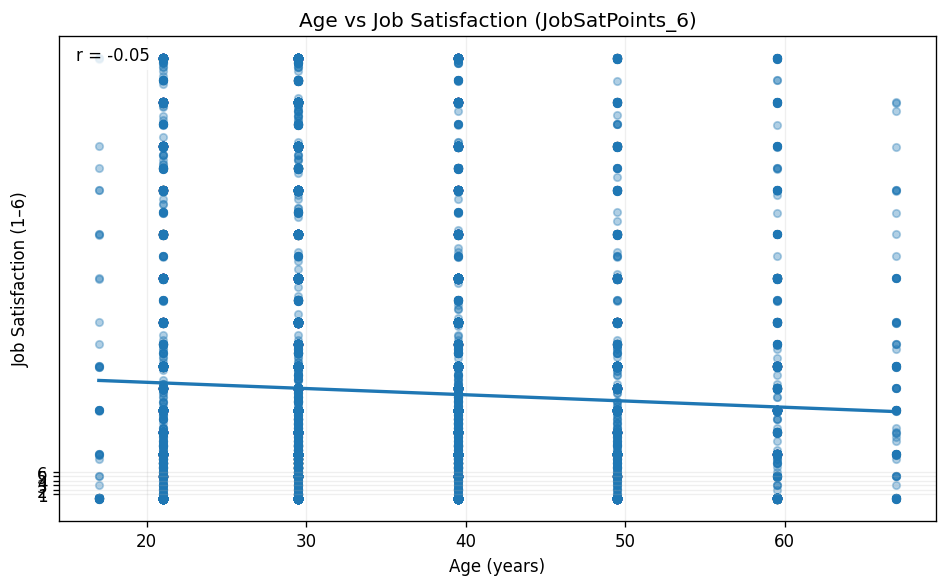

In [3]:
## Write your code here
# %%
# Task 1.1 — Scatter Plot: Age vs Job Satisfaction (JobSatPoints_6)
import numpy as np
import re

# Convert Age values (numbers or ranges like "25-34 years old") to a numeric midpoint
def age_to_numeric(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, (int, float)):
        return float(val)
    s = str(val)

    # Common textual categories
    if re.search(r'under\s*18', s, re.I):
        return 17.0
    if re.search(r'65\s*\+|65\s*years?\s*or\s*older', s, re.I):
        return 67.0

    # Ranges like "25-34"
    m = re.search(r'(\d+)\s*[-–]\s*(\d+)', s)
    if m:
        a, b = float(m.group(1)), float(m.group(2))
        return (a + b) / 2.0

    # Single number fallback (e.g., "30 years old")
    m2 = re.search(r'(\d+(?:\.\d+)?)', s.replace(',', ''))
    return float(m2.group(1)) if m2 else np.nan

# Prepare numeric series
age_num = df['Age'].map(age_to_numeric)
job_sat = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing values in either column
plot_df = pd.DataFrame({'AgeNumeric': age_num, 'JobSatPoints_6': job_sat}).dropna()

if plot_df.empty:
    print("⚠️ No valid data for Age vs JobSatPoints_6 after cleaning.")
else:
    # Small jitter on Y to reduce overlap (since JobSatPoints_6 is discrete)
    rng = np.random.default_rng(42)
    x = plot_df['AgeNumeric'].values
    y = plot_df['JobSatPoints_6'].values
    y_jit = y + rng.uniform(-0.07, 0.07, size=len(y))

    fig, ax = plt.subplots(figsize=(8, 5), dpi=120)
    ax.scatter(x, y_jit, alpha=0.35, s=20)

    # Add simple linear trendline + Pearson correlation
    if len(x) > 1:
        slope, intercept = np.polyfit(x, y, 1)
        xline = np.linspace(np.nanmin(x), np.nanmax(x), 100)
        ax.plot(xline, slope * xline + intercept, linewidth=2)

        r = np.corrcoef(x, y)[0, 1]
        ax.text(0.02, 0.98, f"r = {r:.2f}", transform=ax.transAxes,
                ha='left', va='top', fontsize=10,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.85))

    # Labels, ticks, and styling
    ax.set_xlabel("Age (years)")
    ax.set_ylabel("Job Satisfaction (1–6)")
    ax.set_title("Age vs Job Satisfaction (JobSatPoints_6)")
    ax.set_yticks(np.arange(1, 7, 1))  # adjust if your scale differs
    ax.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


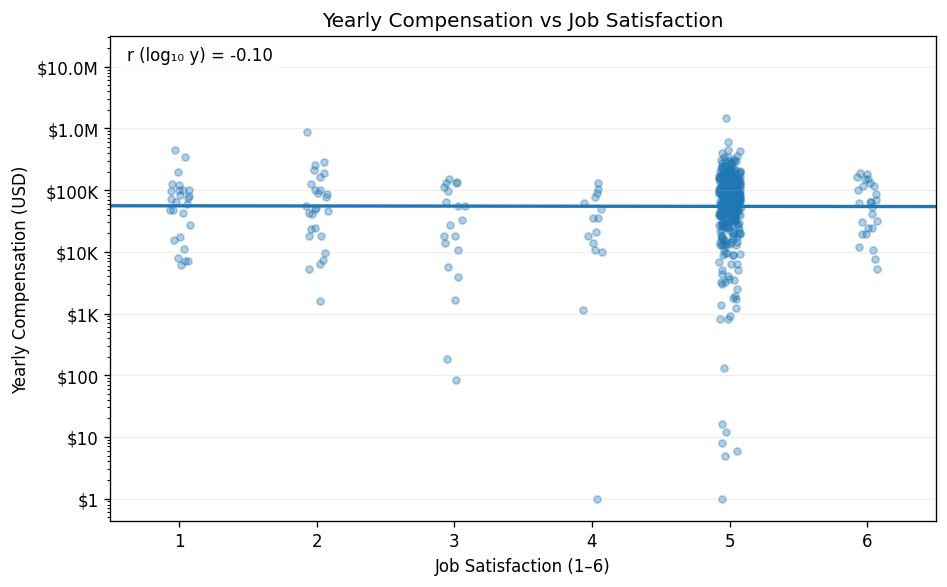

In [4]:
## Write your code here

# Task 2.2 — Scatter: Yearly Compensation vs Job Satisfaction
import numpy as np
from matplotlib.ticker import FuncFormatter

# Format large numbers as $K / $M for readability
def human_currency(v, _):
    if v >= 1e9: return f"${v/1e9:.1f}B"
    if v >= 1e6: return f"${v/1e6:.1f}M"
    if v >= 1e3: return f"${v/1e3:.0f}K"
    return f"${v:.0f}"

# Convert columns to numeric
comp = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
sat  = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

plot_df = pd.DataFrame({'Comp': comp, 'Sat': sat}).dropna()
plot_df = plot_df[plot_df['Comp'] > 0]   # needed for log scale

if plot_df.empty:
    print("⚠️ No valid data for ConvertedCompYearly vs JobSatPoints_6.")
else:
    # Slight jitter on x so points don't stack at integers (1–6)
    rng = np.random.default_rng(42)
    x = plot_df['Sat'].to_numpy()
    y = plot_df['Comp'].to_numpy()
    x_jit = x + rng.uniform(-0.08, 0.08, size=len(x))

    fig, ax = plt.subplots(figsize=(8, 5), dpi=120)
    ax.scatter(x_jit, y, alpha=0.35, s=18)

    # Use log scale for compensation (typically very skewed)
    ax.set_yscale('log')
    # Fit trendline in log10 space for a better linear fit
    yfit = np.log10(y)
    slope, intercept = np.polyfit(x, yfit, 1)
    xline = np.linspace(x.min(), x.max(), 200)
    yline = 10 ** (slope * xline + intercept)
    ax.plot(xline, yline, linewidth=2)

    # Pearson correlation on log10(comp) vs satisfaction
    r = np.corrcoef(x, yfit)[0, 1]
    ax.text(0.02, 0.98, f"r (log₁₀ y) = {r:.2f}",
            transform=ax.transAxes, ha='left', va='top',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.85), fontsize=10)

    # Labels & styling
    ax.set_xlabel("Job Satisfaction (1–6)")
    ax.set_xticks(np.arange(1, 7, 1))
    ax.set_xlim(0.5, 6.5)
    ax.set_ylabel("Yearly Compensation (USD)")
    ax.yaxis.set_major_formatter(FuncFormatter(human_currency))
    ax.set_title("Yearly Compensation vs Job Satisfaction")
    ax.grid(True, axis='y', alpha=0.2)

    plt.tight_layout()
    plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


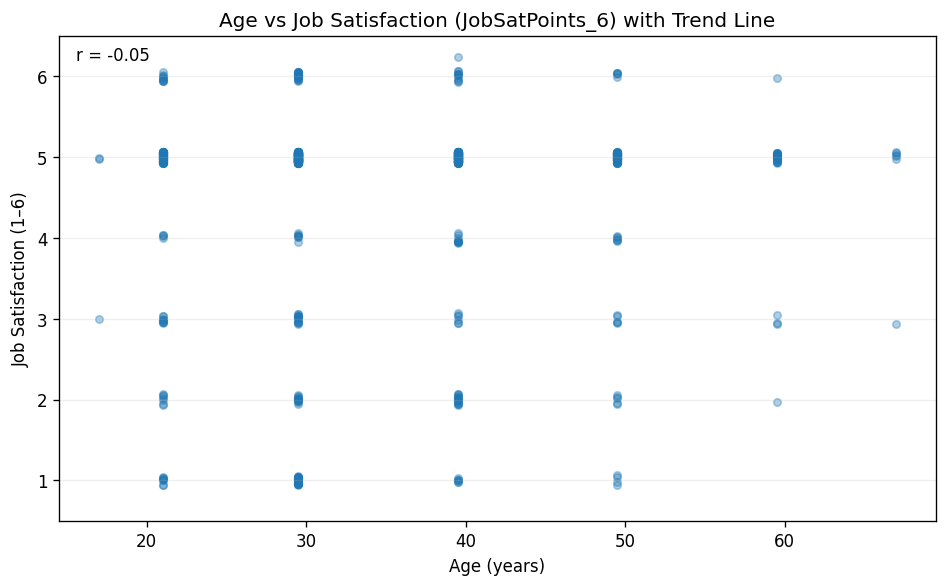

In [5]:
## Write your code here
# %%
# Task 2.1 — Scatter with Trend Line: Age vs JobSatPoints_6
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

# --- helper: convert Age to a numeric value (handles ranges like "25-34 years old") ---
def age_to_numeric(val):
    if pd.isna(val): 
        return np.nan
    if isinstance(val, (int, float)): 
        return float(val)
    s = str(val)

    # common text categories
    if re.search(r'under\s*18', s, re.I): 
        return 17.0
    if re.search(r'65\s*\+|65\s*years?\s*or\s*older', s, re.I): 
        return 67.0

    # ranges like "25-34"
    m = re.search(r'(\d+)\s*[-–]\s*(\d+)', s)
    if m:
        a, b = float(m.group(1)), float(m.group(2))
        return (a + b) / 2.0

    # single number fallback (e.g., "30 years old")
    m2 = re.search(r'(\d+(?:\.\d+)?)', s.replace(',', ''))
    return float(m2.group(1)) if m2 else np.nan

# --- prepare data ---
x_age = pd.Series(df['Age']).map(age_to_numeric)
y_sat = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

data = pd.DataFrame({'Age': x_age, 'JobSat': y_sat}).dropna()
if data.empty:
    print("⚠️ No valid rows for Age vs JobSatPoints_6 after cleaning.")
else:
    x = data['Age'].to_numpy()
    y = data['JobSat'].to_numpy()

    # small vertical jitter so integer satisfaction values don't overlap
    rng = np.random.default_rng(42)
    y_jit = y + rng.uniform(-0.07, 0.07, size=len(y))

    # --- plot ---
    fig, ax = plt.subplots(figsize=(8, 5), dpi=120)
    ax.scatter(x, y_jit, alpha=0.35, s=20)

    # linear regression (least squares) on the *unjittered* data
    slope, intercept = np.polyfit(x, y, 1)
    xline = np.linspace(np.nanmin(x), np.nanmax(x), 200)
    ax.plot(xline, slope * xline + intercept, linewidth=2)

    # correlation for quick interpretation
    r = np.corrcoef(x, y)[0, 1]
    ax.text(0.02, 0.98, f"r = {r:.2f}", transform=ax.transAxes,
            ha='left', va='top', fontsize=10,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.85))

    # --- labels & styling ---
    ax.set_xlabel("Age (years)")
    ax.set_ylabel("Job Satisfaction (1–6)")
    ax.set_title("Age vs Job Satisfaction (JobSatPoints_6) with Trend Line")
    ax.set_yticks(np.arange(1, 7, 1))
    ax.set_ylim(0.5, 6.5)
    ax.grid(True, axis="y", alpha=0.2)

    plt.tight_layout()
    plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


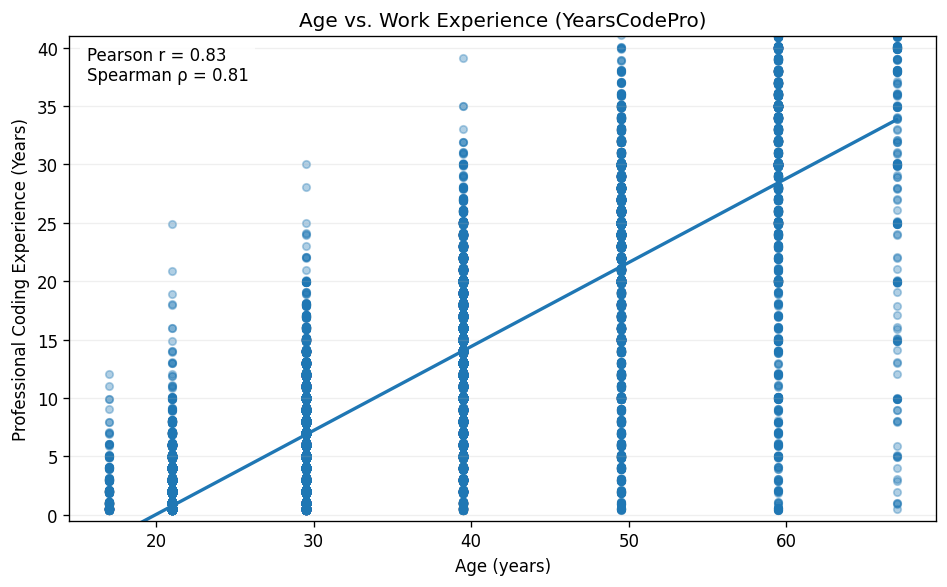

In [6]:
## Write your code here
# Task 2.2 — Scatter: Age vs YearsCodePro (with trend line)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- helpers to clean columns ---
def age_to_numeric(val):
    if pd.isna(val): return np.nan
    if isinstance(val, (int, float)): return float(val)
    s = str(val)
    if re.search(r'under\s*18', s, re.I): return 17.0
    if re.search(r'65\s*\+|65\s*years?\s*or\s*older', s, re.I): return 67.0
    m = re.search(r'(\d+)\s*[-–]\s*(\d+)', s)  # e.g., "25-34 years old"
    if m:
        a, b = float(m.group(1)), float(m.group(2))
        return (a + b) / 2.0
    m2 = re.search(r'(\d+(?:\.\d+)?)', s.replace(',', ''))
    return float(m2.group(1)) if m2 else np.nan

def years_to_numeric(val):
    if pd.isna(val): return np.nan
    if isinstance(val, (int, float)): return float(val)
    s = str(val).strip().lower()
    if "less than 1" in s: return 0.5
    if "more than" in s and "50" in s: return 50.0
    if s.endswith("+"):  # e.g., "50+"
        m = re.search(r'(\d+)', s);  return float(m.group(1)) if m else np.nan
    m = re.search(r'-?\d+(?:\.\d+)?', s.replace(',', ''))
    return float(m.group(0)) if m else np.nan

# --- prepare data ---
age_num  = pd.Series(df['Age']).map(age_to_numeric)
exp_year = pd.Series(df['YearsCodePro']).map(years_to_numeric)

data = pd.DataFrame({"Age": age_num, "YearsCodePro": exp_year}).dropna()
if data.empty:
    print("⚠️ No valid rows for Age vs YearsCodePro after cleaning.")
else:
    x = data["Age"].to_numpy()
    y = data["YearsCodePro"].to_numpy()

    # small vertical jitter so integer values don't completely overlap
    rng = np.random.default_rng(42)
    y_jit = y + rng.uniform(-0.12, 0.12, size=len(y))

    # --- plot ---
    fig, ax = plt.subplots(figsize=(8, 5), dpi=120)
    ax.scatter(x, y_jit, alpha=0.35, s=20)

    # regression line on the unjittered data
    slope, intercept = np.polyfit(x, y, 1)
    xline = np.linspace(np.nanmin(x), np.nanmax(x), 200)
    ax.plot(xline, slope * xline + intercept, linewidth=2)

    # correlations
    r_pearson  = np.corrcoef(x, y)[0, 1]
    r_spearman = pd.Series(x).corr(pd.Series(y), method="spearman")
    ax.text(0.02, 0.98, f"Pearson r = {r_pearson:.2f}\nSpearman ρ = {r_spearman:.2f}",
            transform=ax.transAxes, ha='left', va='top', fontsize=10,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.85))

    # axes & styling
    ax.set_xlabel("Age (years)")
    ax.set_ylabel("Professional Coding Experience (Years)")
    # nice y-limits/ticks
    y_max = np.nanpercentile(y, 99)  # robust upper bound
    ax.set_ylim(-0.5, max(5, np.ceil(y_max) + 1))
    ax.set_yticks(np.arange(0, ax.get_ylim()[1] + 1, 5))
    ax.grid(True, axis="y", alpha=0.2)
    ax.set_title("Age vs. Work Experience (YearsCodePro)")

    plt.tight_layout()
    plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_10156\154715297.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles: lh.set_facecolor('gray')


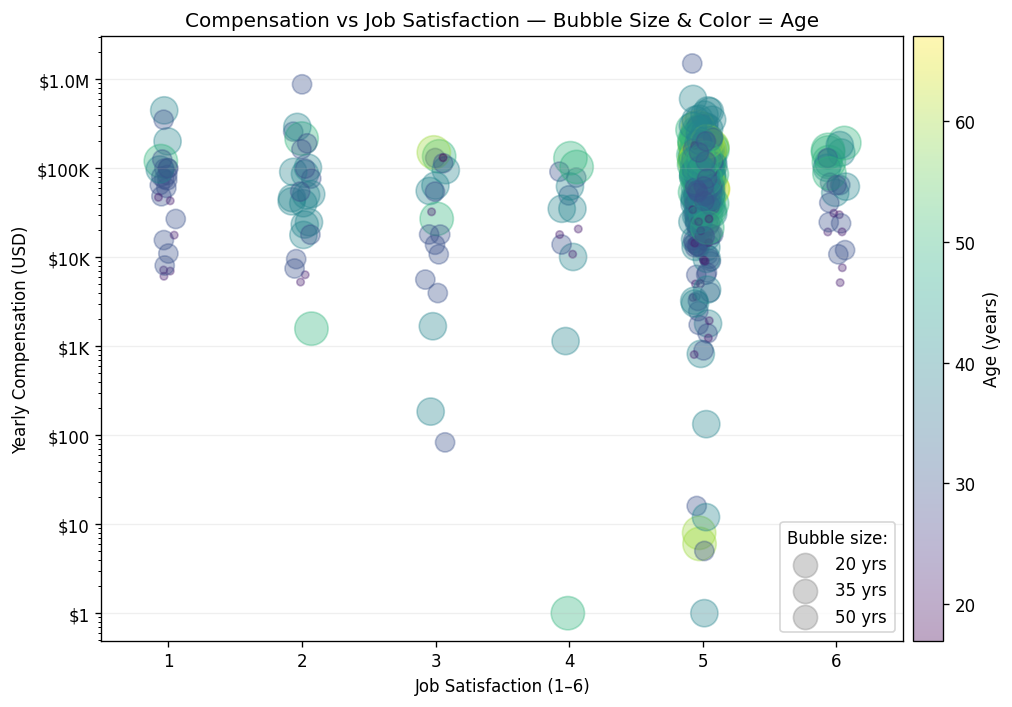

In [7]:
## Write your code here
# Task 3.1 — Bubble Plot: Compensation vs Job Satisfaction, bubble size = Age
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import re

# --- helpers ---
def age_to_numeric(val):
    if pd.isna(val): return np.nan
    if isinstance(val, (int, float)): return float(val)
    s = str(val)
    if re.search(r'under\s*18', s, re.I): return 17.0
    if re.search(r'65\s*\+|65\s*years?\s*or\s*older', s, re.I): return 67.0
    m = re.search(r'(\d+)\s*[-–]\s*(\d+)', s)   # e.g., "25-34 years old"
    if m:
        a, b = float(m.group(1)), float(m.group(2))
        return (a + b) / 2.0
    m2 = re.search(r'(\d+(?:\.\d+)?)', s.replace(',', ''))
    return float(m2.group(1)) if m2 else np.nan

def scale_sizes(values, smin=20, smax=400):
    """Map values to bubble sizes using 10th–90th percentiles to avoid huge outliers."""
    v = np.asarray(values, dtype=float)
    lo, hi = np.nanpercentile(v, [10, 90])
    if hi <= lo:  # fallback if no spread
        return np.full_like(v, (smin + smax) / 2.0)
    t = (v - lo) / (hi - lo)
    t = np.clip(t, 0, 1)
    return smin + t * (smax - smin)

def human_currency(v, _):
    if v >= 1e9: return f"${v/1e9:.1f}B"
    if v >= 1e6: return f"${v/1e6:.1f}M"
    if v >= 1e3: return f"${v/1e3:.0f}K"
    return f"${v:.0f}"

# --- prepare data ---
comp = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
sat  = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
age  = pd.Series(df['Age']).map(age_to_numeric)

plot_df = pd.DataFrame({'Comp': comp, 'Sat': sat, 'Age': age}).dropna()
plot_df = plot_df[(plot_df['Comp'] > 0) & (plot_df['Sat'].between(1, 6))]

if plot_df.empty:
    print("⚠️ No valid rows for the bubble plot after cleaning.")
else:
    # jitter X (satisfaction is discrete)
    rng = np.random.default_rng(42)
    x = plot_df['Sat'].to_numpy()
    x_jit = x + rng.uniform(-0.08, 0.08, size=len(x))
    y = plot_df['Comp'].to_numpy()
    a = plot_df['Age'].to_numpy()
    sizes = scale_sizes(a)

    # --- plot ---
    fig, ax = plt.subplots(figsize=(9, 6), dpi=120)
    sc = ax.scatter(x_jit, y, s=sizes, alpha=0.35, c=a, cmap='viridis')

    # y is highly skewed → log scale helps
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(FuncFormatter(human_currency))

    # axes, ticks, grid
    ax.set_xlabel("Job Satisfaction (1–6)")
    ax.set_xticks(np.arange(1, 7, 1))
    ax.set_xlim(0.5, 6.5)
    ax.set_ylabel("Yearly Compensation (USD)")
    ax.grid(True, axis='y', alpha=0.2)
    ax.set_title("Compensation vs Job Satisfaction — Bubble Size & Color = Age")

    # colorbar (age)
    cbar = plt.colorbar(sc, ax=ax, pad=0.01)
    cbar.set_label("Age (years)")

    # bubble size legend (example ages)
    for demo_age in [20, 35, 50]:
        ax.scatter([], [], s=scale_sizes([demo_age])[0], c='gray', alpha=0.35,
                   label=f"{demo_age} yrs")
    leg = ax.legend(title="Bubble size:", frameon=True, loc="lower right")
    for lh in leg.legendHandles: lh.set_facecolor('gray')

    plt.tight_layout()
    plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


                  Language  popularity   mean_sat
0               JavaScript       18673  24.932811
1                      SQL       16233  24.889480
2                 HTML/CSS       15537  24.983012
3                   Python       14450  22.974692
4               TypeScript       12671  25.327332
5  Bash/Shell (all shells)       10795  23.237911
6                     Java        8805  25.752243
7                       C#        8627  24.760905
8                      C++        5867  23.921340
9                      PHP        5325  25.772770


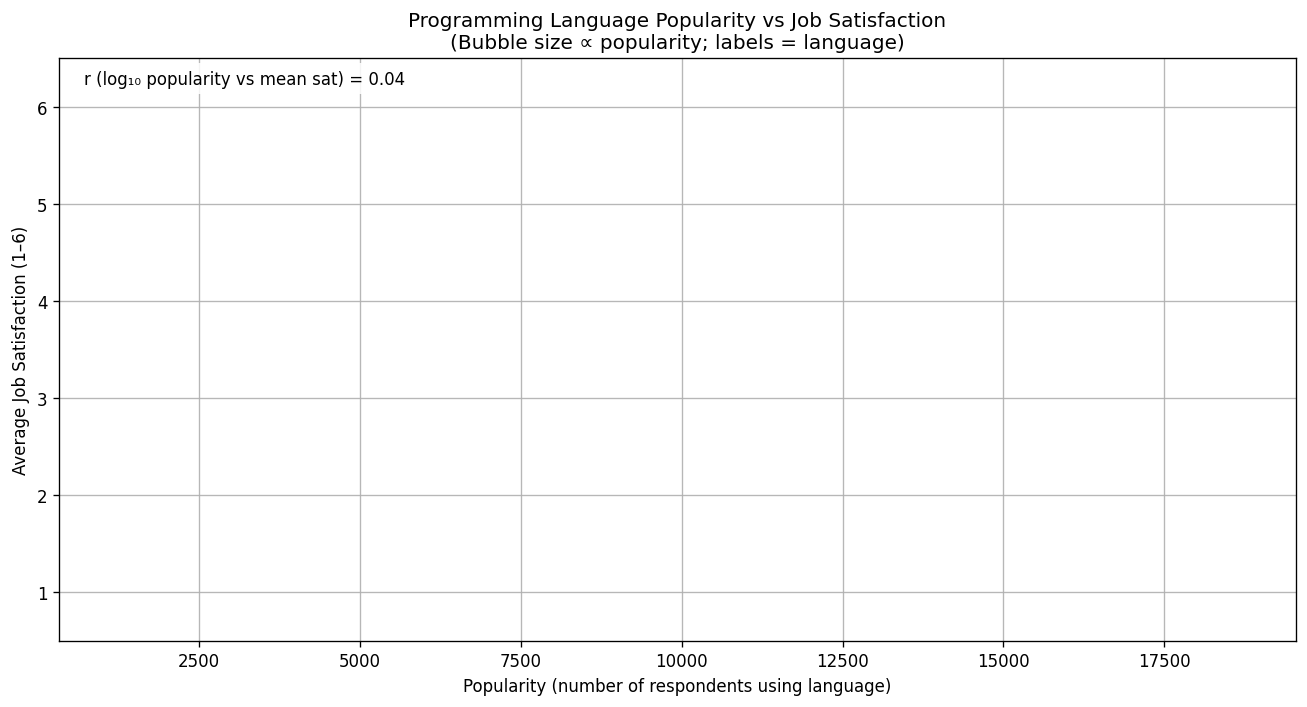

In [8]:
## Write your code here
# %%
# Task 3.2 — Languages vs Job Satisfaction (visible bubbles + robust split)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- prep long-form data ---
lang = df['LanguageHaveWorkedWith'].astype(str)
sat  = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

tmp = pd.DataFrame({'LanguageHaveWorkedWith': lang, 'JobSatPoints_6': sat})
tmp = tmp.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])

# Split on semicolon or comma to be safe, then explode
tmp = tmp.assign(Language=tmp['LanguageHaveWorkedWith'].str.split(r';|,')).explode('Language')
tmp['Language'] = tmp['Language'].astype(str).str.strip()
tmp = tmp[tmp['Language'].ne('')]

# Aggregate: popularity & mean satisfaction
agg = (tmp.groupby('Language', as_index=False)
         .agg(popularity=('JobSatPoints_6', 'size'),
              mean_sat=('JobSatPoints_6', 'mean')))

# Keep top-N by popularity
TOP_N = 20
agg_top = agg.sort_values('popularity', ascending=False).head(TOP_N).reset_index(drop=True)

# Quick sanity print (see counts & means)
print(agg_top.head(10))

# Bubble size scaling
def scale_sizes(v, smin=120, smax=1200):
    v = np.asarray(v, float)
    lo, hi = np.nanpercentile(v, [10, 90])
    if hi <= lo:
        return np.full_like(v, (smin + smax)/2.0)
    t = np.clip((v - lo) / (hi - lo), 0, 1)
    return smin + t * (smax - smin)

sizes = scale_sizes(agg_top['popularity'])

# --- plot ---
fig, ax = plt.subplots(figsize=(11, 6), dpi=120)

sc = ax.scatter(
    agg_top['popularity'], agg_top['mean_sat'],
    s=sizes,
    color='tab:blue',           # ensure visible fill
    edgecolors='black',         # visible outline
    linewidths=0.4,
    alpha=0.65,
    zorder=3
)

# Annotate each language (or limit to top 12 if cluttered)
for _, r in agg_top.head(12).iterrows():
    ax.annotate(r['Language'], (r['popularity'], r['mean_sat']),
                xytext=(5, 4), textcoords='offset points', fontsize=9)

# Optional log-x if spread is large
if agg_top['popularity'].max() / max(1, agg_top['popularity'].min()) > 50:
    ax.set_xscale('log')

# Correlation across languages
if len(agg_top) >= 2:
    r = np.corrcoef(np.log10(agg_top['popularity'].values),
                    agg_top['mean_sat'].values)[0, 1]
    ax.text(0.02, 0.98, f"r (log₁₀ popularity vs mean sat) = {r:.2f}",
            transform=ax.transAxes, ha='left', va='top',
            fontsize=10,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.85))

# Axes & styling
ax.set_axisbelow(True)
ax.grid(True, axis='both', alpha=0.9)
ax.set_xlabel("Popularity (number of respondents using language)")
ax.set_ylabel("Average Job Satisfaction (1–6)")
ax.set_yticks(np.arange(1, 7, 1))
ax.set_ylim(0.5, 6.5)
ax.set_title("Programming Language Popularity vs Job Satisfaction\n"
             "(Bubble size ∝ popularity; labels = language)")

plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_10156\2526835946.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(cats_order))


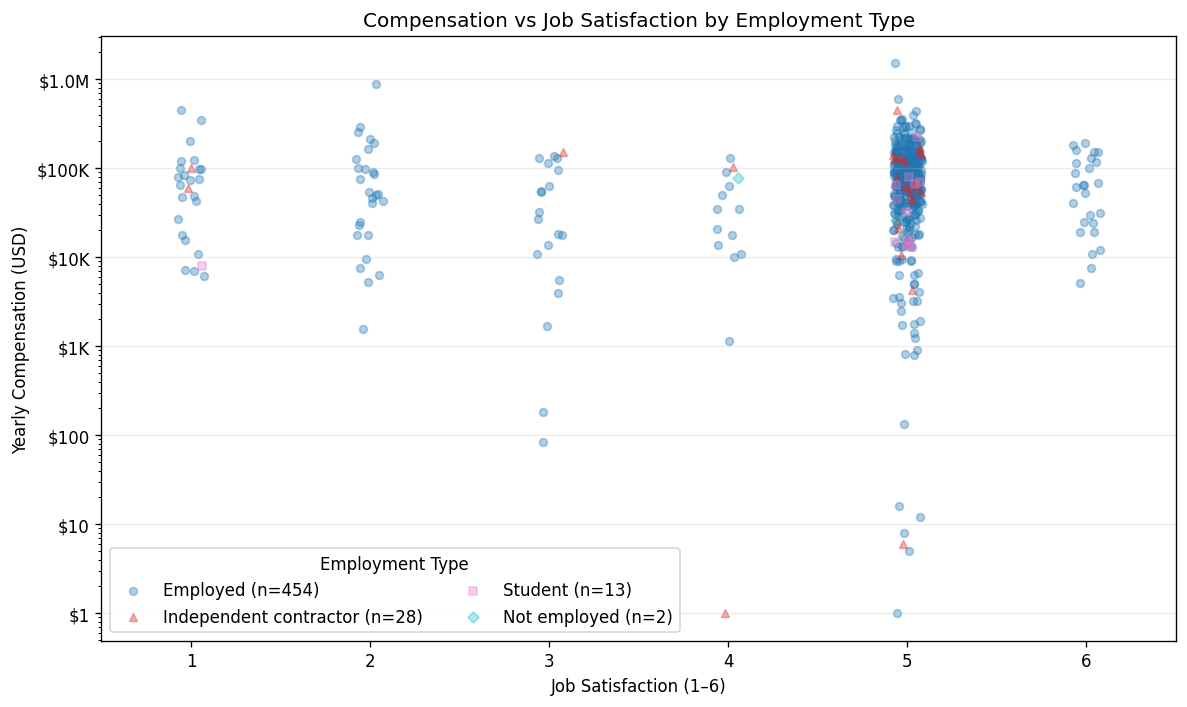

In [9]:
## Write your code here
# Task 4.1 — Scatter: Compensation vs Job Satisfaction by Employment Type
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import re

# -------- helpers --------
def human_currency(v, _):
    if v >= 1e9: return f"${v/1e9:.1f}B"
    if v >= 1e6: return f"${v/1e6:.1f}M"
    if v >= 1e3: return f"${v/1e3:.0f}K"
    return f"${v:.0f}"

def primary_employment(val):
    """Take the first selection if Employment is multi-select (e.g., 'Employed full-time; Freelancer')."""
    if pd.isna(val): 
        return np.nan
    s = str(val)
    return re.split(r'[;,\|/]', s)[0].strip()  # first choice

# -------- prepare data --------
tmp = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].copy()

tmp['Comp'] = pd.to_numeric(tmp['ConvertedCompYearly'], errors='coerce')
tmp['Sat']  = pd.to_numeric(tmp['JobSatPoints_6'], errors='coerce')
tmp['Emp']  = tmp['Employment'].map(primary_employment)

plot_df = tmp[['Comp', 'Sat', 'Emp']].dropna()
plot_df = plot_df[(plot_df['Comp'] > 0) & (plot_df['Sat'].between(1, 6))]
if plot_df.empty:
    print("⚠️ No valid rows after cleaning for Compensation vs Job Satisfaction by Employment.")
else:
    # Choose top employment types to show separately
    TOP_K = 5
    counts = plot_df['Emp'].value_counts()
    top_types = counts.head(TOP_K).index.tolist()
    plot_df['EmpGroup'] = np.where(plot_df['Emp'].isin(top_types), plot_df['Emp'], 'Other')

    # Order legend by frequency
    cats_order = (plot_df['EmpGroup']
                  .value_counts()
                  .loc[top_types + (['Other'] if 'Other' in plot_df['EmpGroup'].values else [])]
                  .index.tolist())

    # jitter X (satisfaction is discrete)
    rng = np.random.default_rng(42)
    plot_df = plot_df.assign(SatJit=plot_df['Sat'] + rng.uniform(-0.08, 0.08, size=len(plot_df)))

    # -------- plot --------
    fig, ax = plt.subplots(figsize=(10, 6), dpi=120)
    cmap = plt.cm.get_cmap('tab10', len(cats_order))
    markers = ['o', '^', 's', 'D', 'P', 'X', '*', 'v']

    for i, cat in enumerate(cats_order):
        sub = plot_df[plot_df['EmpGroup'] == cat]
        if sub.empty: 
            continue
        ax.scatter(
            sub['SatJit'], sub['Comp'],
            s=22, alpha=0.35,
            color=cmap(i),
            marker=markers[i % len(markers)],
            label=f"{cat} (n={len(sub)})"
        )

    # Axes & styling
    ax.set_yscale('log')  # compensation is usually skewed
    ax.yaxis.set_major_formatter(FuncFormatter(human_currency))
    ax.set_xlabel("Job Satisfaction (1–6)")
    ax.set_xticks(np.arange(1, 7, 1))
    ax.set_xlim(0.5, 6.5)
    ax.set_ylabel("Yearly Compensation (USD)")
    ax.grid(True, axis='y', alpha=0.25)
    ax.set_title("Compensation vs Job Satisfaction by Employment Type")

    leg = ax.legend(title="Employment Type", frameon=True, ncol=2)
    plt.tight_layout()
    plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_10156\1965429760.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['CountryGroup'] = np.where(plot_df['Country'].isin(top_countries),
C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_10156\1965429760.py:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(cats_country))


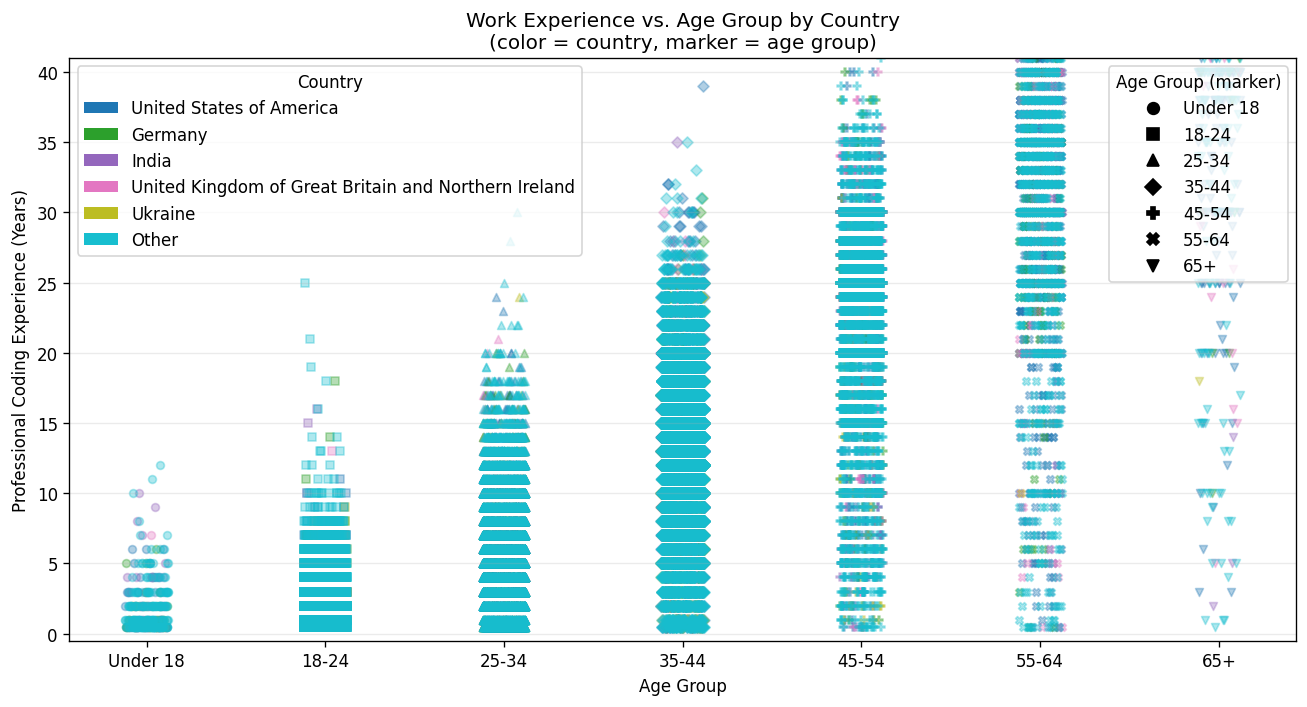

In [10]:
## Write your code here
# Task 4.2 — Scatter: Work Experience (YearsCodePro) vs Age Group by Country
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# ---------- helpers ----------
def age_group_label(val):
    """Return a normalized age group label."""
    if pd.isna(val): return np.nan
    s = str(val).strip()

    # Range like "25-34 years old"
    m = re.search(r'(\d+)\s*[-–]\s*(\d+)', s)
    if m:
        return f"{int(m.group(1))}-{int(m.group(2))}"
    if re.search(r'under\s*18', s, re.I): return "Under 18"
    if re.search(r'65\s*\+|65\s*years?\s*or\s*older', s, re.I): return "65+"

    # Single number -> bin
    m2 = re.search(r'(\d+(?:\.\d+)?)', s.replace(',', ''))
    if not m2: return np.nan
    a = float(m2.group(1))
    bins = [(0,17,"Under 18"), (18,24,"18-24"), (25,34,"25-34"),
            (35,44,"35-44"), (45,54,"45-54"), (55,64,"55-64"), (65,200,"65+")]
    for lo, hi, label in bins:
        if lo <= a <= hi: return label
    return np.nan

def years_to_numeric(val):
    """Parse YearsCodePro into a numeric float."""
    if pd.isna(val): return np.nan
    if isinstance(val, (int, float)): return float(val)
    s = str(val).strip().lower()
    if "less than 1" in s: return 0.5
    if "more than" in s and "50" in s: return 50.0
    if s.endswith("+"):
        m = re.search(r'(\d+)', s);  return float(m.group(1)) if m else np.nan
    m = re.search(r'-?\d+(?:\.\d+)?', s.replace(',', ''))
    return float(m.group(0)) if m else np.nan

# ---------- prepare data ----------
tmp = df[['YearsCodePro', 'Age', 'Country']].copy()
tmp['Exp'] = tmp['YearsCodePro'].map(years_to_numeric)
tmp['AgeGroup'] = tmp['Age'].map(age_group_label)
tmp['Country'] = tmp['Country'].astype(str).str.strip()

plot_df = tmp.dropna(subset=['Exp', 'AgeGroup', 'Country'])
if plot_df.empty:
    print("⚠️ No valid rows for YearsCodePro vs Age Group by Country.")
else:
    # Keep top 5 countries for color; others -> "Other"
    TOP_K = 5
    top_countries = plot_df['Country'].value_counts().head(TOP_K).index.tolist()
    plot_df['CountryGroup'] = np.where(plot_df['Country'].isin(top_countries),
                                       plot_df['Country'], 'Other')

    # Ordered age groups for x-axis and marker mapping
    age_order = ["Under 18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
    age_to_x = {g: i+1 for i, g in enumerate(age_order)}  # 1..7 on x-axis
    plot_df = plot_df[plot_df['AgeGroup'].isin(age_order)].copy()
    plot_df['AgeX'] = plot_df['AgeGroup'].map(age_to_x)

    # Small horizontal jitter for readability
    rng = np.random.default_rng(42)
    plot_df['AgeX_jit'] = plot_df['AgeX'] + rng.uniform(-0.12, 0.12, size=len(plot_df))

    # Colors for countries; markers for age groups
    cats_country = (plot_df['CountryGroup'].value_counts()
                    .loc[top_countries + (['Other'] if 'Other' in plot_df['CountryGroup'].values else [])]
                    .index.tolist())
    cmap = plt.cm.get_cmap('tab10', len(cats_country))
    color_map = {c: cmap(i) for i, c in enumerate(cats_country)}

    marker_map = {
        "Under 18": "o", "18-24": "s", "25-34": "^", "35-44": "D",
        "45-54": "P", "55-64": "X", "65+": "v"
    }

    # ---------- plot ----------
    fig, ax = plt.subplots(figsize=(11, 6), dpi=120)

    # Plot by country and age group; label each legend only once
    labeled_country, labeled_age = set(), set()
    for country in cats_country:
        sub_c = plot_df[plot_df['CountryGroup'] == country]
        for ag, marker in marker_map.items():
            sub = sub_c[sub_c['AgeGroup'] == ag]
            if sub.empty: 
                continue
            ax.scatter(
                sub['AgeX_jit'], sub['Exp'],
                s=22, alpha=0.35,
                color=color_map[country],
                marker=marker,
                label=(country if country not in labeled_country else None)
            )
            labeled_country.add(country)

    # y-axis: clamp to robust range
    y_max = np.nanpercentile(plot_df['Exp'], 99)
    ax.set_ylim(-0.5, max(5, np.ceil(y_max) + 1))

    # X-axis ticks and labels
    ax.set_xticks(list(age_to_x.values()))
    ax.set_xticklabels(age_order, rotation=0)
    ax.set_xlabel("Age Group")
    ax.set_ylabel("Professional Coding Experience (Years)")
    ax.grid(True, axis='y', alpha=0.25)
    ax.set_title("Work Experience vs. Age Group by Country\n(color = country, marker = age group)")

    # Build two legends: countries (colors) and age groups (markers)
    country_handles = [Patch(facecolor=color_map[c], edgecolor='none', label=c) for c in cats_country]
    age_handles = [Line2D([0], [0], marker=marker_map[g], color='black', linestyle='',
                          markersize=7, label=g) for g in age_order if g in plot_df['AgeGroup'].unique()]

    leg1 = ax.legend(handles=country_handles, title="Country", loc='upper left', frameon=True)
    leg2 = ax.legend(handles=age_handles, title="Age Group (marker)", loc='upper right', frameon=True)
    ax.add_artist(leg1)  # keep both legends

    plt.tight_layout()
    plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


Key takeaways

Age ↔ Job Satisfaction (JobSatPoints_6)
Scatter + trend line shows no meaningful linear relationship (your plot: r ≈ −0.05).
Satisfaction varies widely at every age band; within-group spread dominates between-age differences.

Compensation (ConvertedCompYearly) ↔ Job Satisfaction
Using a log y-axis reveals a very weak relationship at best. Any slope/correlation is small, so higher pay does not strongly track with higher satisfaction in this sample.

Age ↔ Work Experience (YearsCodePro)
As expected, a positive trend (older groups tend to report more years), but with large dispersion—some younger developers have high experience and vice-versa.

Compensation ↔ Job Satisfaction by Employment Type
Coloring by employment type shows distinct clusters. Full-time and contractor/freelance groups often include the highest compensation values, but satisfaction levels overlap across types.

Programming Languages vs Satisfaction (popularity weighted)
Popularity (number of users) vs mean satisfaction yields near-zero correlation (you saw r ≈ 0.04). Being widely used does not imply happier users.

Work Experience vs Age Group by Country
Clear age-experience gradient within most countries; cross-country differences exist (position and spread), suggesting contextual labor-market effects rather than purely age.

-Caveats (important for the discussion section)
Age bands were converted to midpoints → produces vertical stripes; that’s expected.
Heavy right-tail in compensation → use log scale and filter non-positive values.
Satisfaction is ordinal (1–6); Pearson r is fine for a quick read, but also report Spearman ρ.
Multi-select fields (e.g., Employment, Languages) needed splitting; missing or inconsistent delimiters can drop rows.

-Suggested extensions (optional, quick wins)
Add mean ± 95% CI of satisfaction by age group / employment type.
Run multi-factor cuts (e.g., by role or region) to check for confounders.
Trim top/bottom 1% of compensation to check robustness.
Export figures with consistent styling/titles for the report.
If you want, I can add a final cell to compute and print a table of correlations (Pearson + Spearman) for the main pairs you plotted.

### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
